### Libraries
* torchvision
* torchvision.models
* torchvision.datasets
* torchvision.transform
* torch.utils.Dataset
* torch.utils.data.DataLoader

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torchvision.__version__)

0.20.1+cu118


### Getting Dataset
We are using FashionMNIST dataset

In [2]:
train_data = datasets.FashionMNIST(
    root='data',#where we want to dwonload
    train=True,
    download=True,
    transform=ToTensor(),#convverting data to tensors
    target_transform=None#convverting labels to tensors
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [3]:
len(train_data),len(test_data)

(60000, 10000)

In [4]:
images,labels=train_data[0]
images,labels

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names=train_data.classes

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [8]:
images.shape

torch.Size([1, 28, 28])

Here the color channel 1 signifies it has either black(1) or white(0) colors

### Visualizing Data

Text(0.5, 1.0, '9')

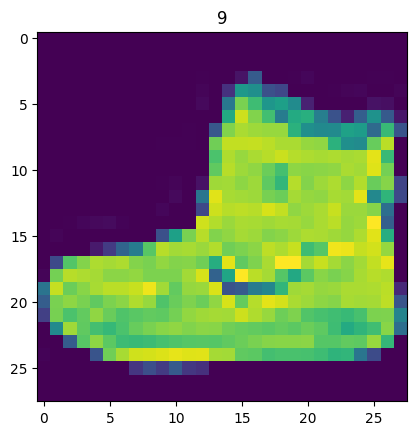

In [9]:
plt.imshow(images.squeeze())
plt.title(labels)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

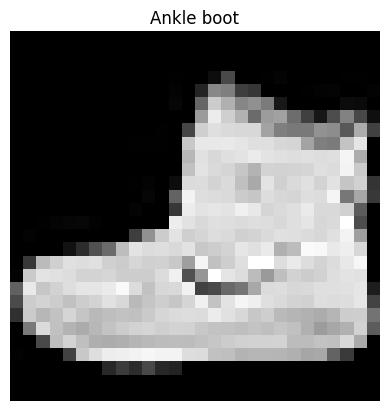

In [10]:
plt.imshow(images.squeeze(),cmap='gray')
plt.title(class_names[labels])
plt.axis(False)

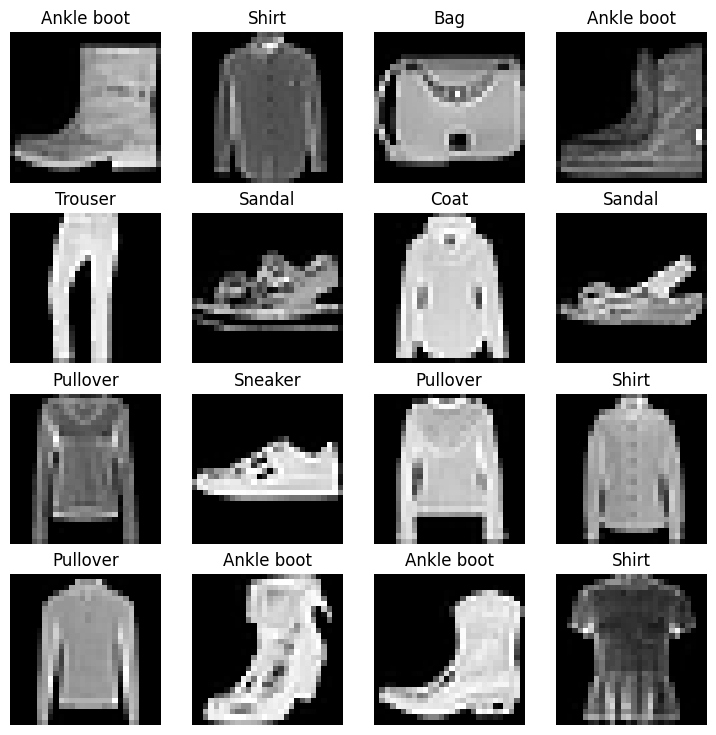

In [11]:
#plot random images
torch.manual_seed(42)

fig=plt.figure(figsize=(9,9))
row,col=4,4
for i in range(1,row*col+1):
    random_idx = torch.randint(0,len(train_data),size=[1]).item()
    img,label = train_data[random_idx]
    fig.add_subplot(row,col,i)
    plt.imshow(img.squeeze(),cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)

In [12]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

### Prepare DataLoader
Right now the data is in Pytorch Datasets
DataLoader turns dataset in to Python iterable.
We want to turn our data into batches or minibatches

we do it in batches as the computation cannot handel the data of 60000 images in one hit and also if we give the data in one hit the updation will occur only once and hte in case of batches the updation occurs in every batch.

In [13]:
train_data.data


tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [14]:
from torch.utils.data import DataLoader

#setup hyperparameter

BATCH_SIZE = 32

#Turning datasets to iterables
train_dataloader=DataLoader(train_data,
           batch_size=BATCH_SIZE,
           shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader,test_dataloader.dataset

(<torch.utils.data.dataloader.DataLoader at 0x21154c14110>,
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [15]:
train_dataloader

In [16]:
#let's checkout what we have created

print(f"Dataloaders:{train_dataloader,test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders:(<torch.utils.data.dataloader.DataLoader object at 0x0000021154C14110>, <torch.utils.data.dataloader.DataLoader object at 0x00000211549C7EC0>)
Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


In [17]:
#checking whats inside trainng data loder
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [18]:
for a,b in train_dataloader:
    print(b)

tensor([5, 4, 8, 7, 4, 7, 7, 3, 7, 1, 1, 4, 9, 4, 8, 2, 6, 2, 8, 9, 7, 3, 4, 5,
        7, 4, 8, 1, 6, 9, 9, 4])
tensor([0, 7, 2, 0, 0, 8, 1, 3, 9, 1, 2, 1, 5, 4, 3, 9, 2, 6, 9, 8, 9, 6, 5, 0,
        3, 1, 7, 9, 7, 1, 8, 9])
tensor([1, 7, 3, 2, 5, 9, 2, 3, 2, 5, 0, 5, 9, 6, 1, 2, 2, 3, 0, 1, 9, 1, 4, 1,
        0, 3, 1, 2, 0, 9, 8, 0])
tensor([9, 4, 2, 3, 3, 1, 5, 5, 5, 3, 1, 2, 0, 2, 9, 0, 7, 0, 6, 4, 2, 2, 1, 8,
        6, 0, 1, 9, 2, 6, 7, 6])
tensor([3, 5, 7, 7, 0, 0, 5, 8, 6, 9, 9, 5, 8, 0, 8, 3, 3, 5, 6, 8, 3, 5, 4, 2,
        5, 0, 4, 8, 8, 4, 2, 5])
tensor([4, 8, 5, 9, 8, 0, 2, 2, 9, 1, 2, 9, 1, 9, 2, 6, 9, 5, 9, 3, 3, 7, 9, 0,
        2, 5, 4, 2, 2, 0, 7, 9])
tensor([6, 0, 7, 0, 1, 2, 3, 5, 5, 3, 3, 2, 2, 3, 3, 4, 9, 0, 6, 7, 5, 9, 0, 8,
        1, 8, 8, 2, 6, 6, 1, 5])
tensor([7, 6, 3, 4, 4, 7, 1, 6, 4, 4, 6, 5, 6, 2, 6, 3, 8, 0, 5, 1, 9, 5, 1, 7,
        1, 1, 4, 4, 2, 2, 7, 1])
tensor([4, 9, 7, 9, 4, 9, 3, 1, 9, 0, 7, 7, 8, 1, 3, 2, 6, 1, 7, 7, 1, 7, 3, 8,
        4, 1, 1,

In [19]:
torch.randint(0,len(train_features_batch),size=[1])

tensor([11])

Image shape:torch.Size([1, 28, 28])
Label:6, label size:torch.Size([])


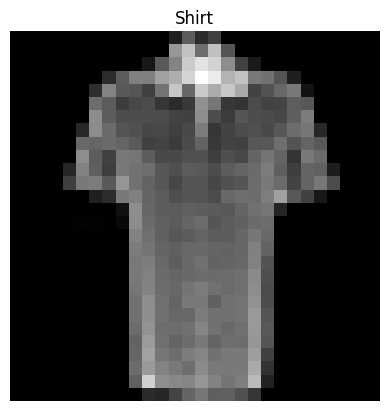

In [20]:
#show a sample

torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
img,label = train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f"Image shape:{img.shape}")
print(f"Label:{label}, label size:{label.shape}")

### Model 0:Build a baseline model

A baseline model is a simple model we try ti improve with susequent modeling and experiments.



In [21]:
#creating a flatten layer
flatten_model=nn.Flatten()

#get sinle sample
x=train_features_batch[0]

#Flatten the sample

output = flatten_model(x)

print(f"shape before flattening:{x.shape}")
print(f"Shape after flattening:{output.shape}")

shape before flattening:torch.Size([1, 28, 28])
Shape after flattening:torch.Size([1, 784])


In [22]:
output.squeeze().shape

torch.Size([784])

In [23]:
from torch import nn 
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)



In [24]:
torch.manual_seed(42)

model_0= FashionMNISTModelV0(input_shape=784,
                           hidden_units=10,
                           output_shape=len(class_names)
                           ).to('cpu')

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x= torch.rand(size=[1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [26]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                             lr=0.1)

import helper_functions as hf

### Creating a function to time our experiments

In [27]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end:float,
                     device:torch.device=None):
    """Prints the differnce between endtime and start time"""
    
    total_time=end-start
    print(f"Train time on{device}: {total_time:.3f} seconds")
    return total_time

### Creating a training loop and creating a model on batches of data

In [28]:
#import tqdm for progress bar
from tqdm.auto import tqdm


In [29]:
len(train_dataloader)

1875

In [30]:
torch.manual_seed(42)
train_time_start_on_cpu= timer()

epochs=3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")
    ##Training
    train_loss =0
    #Add a loop through the looping batches
    for batch, (X,y) in enumerate(train_dataloader):
        model_0.train()
        
        y_logits = model_0(X)
        y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)
        loss = loss_fn(y_logits,y)
        
        train_loss+=loss #we accumulate i.e add the loss and then later find the mean
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch %400 ==0:
            print(f"Looked at: {batch * len(X)}/{len(train_dataloader.dataset)} samples.")
    
    train_loss/=len(train_dataloader)
    ## testing
    test_loss,test_acc=0,0
    model_0.eval()
    with torch.inference_mode():
        for X_test,y_test in (test_dataloader):
            
            test_logits= model_0(X_test)
            test_pred = torch.softmax(test_logits,dim=1).argmax(dim=1)
            test_loss+=loss_fn(test_logits,y_test)
            
            test_acc+= hf.accuracy_fn(y_true=y_test, y_pred=test_pred)
            
        test_loss/=len(test_dataloader)
        
        test_acc /=len(test_dataloader)
    print(f"\nTrain Loss:{train_loss:.4f} | Test loss:{test_loss:.4f}, Test acc:{test_acc:4f}%")
    
#train time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at: 0/60000 samples.
Looked at: 12800/60000 samples.
Looked at: 25600/60000 samples.
Looked at: 38400/60000 samples.
Looked at: 51200/60000 samples.

Train Loss:0.5904 | Test loss:0.5095, Test acc:82.038738%
Epoch: 1
------
Looked at: 0/60000 samples.
Looked at: 12800/60000 samples.
Looked at: 25600/60000 samples.
Looked at: 38400/60000 samples.
Looked at: 51200/60000 samples.

Train Loss:0.4763 | Test loss:0.4799, Test acc:83.196885%
Epoch: 2
------
Looked at: 0/60000 samples.
Looked at: 12800/60000 samples.
Looked at: 25600/60000 samples.
Looked at: 38400/60000 samples.
Looked at: 51200/60000 samples.

Train Loss:0.4550 | Test loss:0.4766, Test acc:83.426518%
Train time oncpu: 33.481 seconds


### Make predictions and get model 0 results

In [73]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device):
    loss,acc=0,0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            
            X,y=X.to(device),y.to(device)
            y_pred= model(X)
            
            loss+=loss_fn(y_pred,y)
            
            acc+= accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
            
        loss/=len(data_loader)
        
        acc /=len(data_loader)
    print(f"\nTrain Loss:{train_loss:.4f} | Test loss:{test_loss:.4f}, Test acc:{test_acc:4f}%")
    
    return {"model_name": model.__class__.__name__,
            "model_loss":loss.item(),
            "model_acc":acc}

model_0_results =eval_model(model=model_0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=hf.accuracy_fn,
                            device=None)
model_0_results   

  0%|          | 0/313 [00:00<?, ?it/s]


Train Loss:0.4550 | Test loss:0.4766, Test acc:83.426518%


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [32]:
device='cuda' if torch.cuda.is_available() else 'cpu'

In [33]:
!nvidia-smi

Thu Jan  9 16:25:54 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.36                 Driver Version: 566.36         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   42C    P3             13W /   35W |       0MiB /   6144MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### Model 1 : Building another model with non_linearity


In [34]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # flatten inputs into a single vector
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )
  
  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [35]:

torch.manual_seed(42)
model_1= FashionMNISTModelV1(input_shape=784,
                             hidden_units=10,
                             output_shape=len(class_names)).to(device)



In [36]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss() # measure how wrong our model is
optimizer = torch.optim.SGD(params=model_1.parameters(), # tries to update our model's parameters to reduce the loss 
                            lr=0.1)

In [37]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """Performs a training with model trying to learn on data_loader."""
  train_loss, train_acc = 0, 0

  # Put model into training mode
  model.train()

  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
    # Put data on target device 
    X, y = X.to(device), y.to(device)

    # 1. Forward pass (outputs the raw logits from the model)
    y_pred = model(X)
    
    # 2. Calculate loss and accuracy (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1)) # go from logits -> prediction labels
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Loss backward
    loss.backward()
    
    # 5. Optimizer step (update the model's parameters once *per batch*)
    optimizer.step()
  
  # Divide total train loss and acc by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [38]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """Performs a testing loop step on model going over data_loader."""
  test_loss, test_acc = 0, 0
  
  # Put the model in eval mode
  model.eval()

  # Turn on inference mode context manager
  with torch.inference_mode():
    for X, y in data_loader:
      # Send the data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass (outputs raw logits)
      test_pred = model(X)

      # 2. Calculuate the loss/acc
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1)) # go from logits -> prediction labels 

    # Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

In [39]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)
     

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----------
Train loss: 1.09199 | Train acc: 61.34%
Test loss: 0.95636 | Test acc: 65.00%

Epoch: 1
----------
Train loss: 0.78101 | Train acc: 71.93%
Test loss: 0.72227 | Test acc: 73.91%

Epoch: 2
----------
Train loss: 0.67027 | Train acc: 75.94%
Test loss: 0.68500 | Test acc: 75.02%

Train time oncuda: 34.585 seconds


### Convolutional Neural Network(CNN)

here we replicate the TinyVgg model

In [75]:
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from CNN explainer website.
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        # Create a conv layer - https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
        nn.Conv2d(in_channels=input_shape, 
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), # values we can set ourselves in our NN's are called hyperparameters
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, # there's a trick to calculating this...
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    #print(f"Output shape of conv_block_1: {x.shape}")
    x = self.conv_block_2(x) 
    #print(f"Output shape of conv_block_2: {x.shape}")
    x = self.classifier(x)
    #print(f"Output shape of classifier: {x.shape}")
    return x

In [76]:
images.shape

torch.Size([1, 28, 28])

In [77]:
imgage = torch.rand(size=(32,3,28,28))
x=imgage[0]
x.shape

torch.Size([3, 28, 28])

In [78]:
torch.manual_seed(42)

model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [79]:
dummy_tensor = torch.rand(size=(1,28,28))
dummy_tensor.shape

torch.Size([1, 28, 28])

In [80]:
dummy_result= model_2(dummy_tensor.unsqueeze(0).to(device))
dummy_result.shape

torch.Size([1, 10])

In [81]:
from helper_functions import accuracy_fn

loss_fn=nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)



In [82]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer() 

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)
     

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.61641 | Train acc: 77.69%
Test loss: 0.40414 | Test acc: 85.96%

Epoch: 1
-------
Train loss: 0.36402 | Train acc: 86.94%
Test loss: 0.34955 | Test acc: 87.51%

Epoch: 2
-------
Train loss: 0.32823 | Train acc: 88.13%
Test loss: 0.32882 | Test acc: 88.25%

Train time oncuda: 38.161 seconds


In [83]:

# Get model_2 results
model_2_results = eval_model(
     model=model_2,
     data_loader=test_dataloader,
     loss_fn=loss_fn,
     accuracy_fn=accuracy_fn,
     device=device
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]


Train Loss:0.4550 | Test loss:0.4766, Test acc:83.426518%


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32881879806518555,
 'model_acc': 88.2488019169329}

In [85]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV2,0.328819,88.248802


In [86]:
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,33.481110
1,FashionMNISTModelV2,0.328819,88.248802,38.161138


In [87]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)
     

In [88]:

import random
# random.seed(42)
test_samples = [] 
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

In [89]:


# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View first two prediction probabilities
pred_probs[:2]
     

tensor([[1.2200e-03, 9.1217e-05, 3.9254e-02, 1.0021e-03, 5.6525e-01, 2.0227e-07,
         3.8326e-01, 3.7217e-06, 9.9210e-03, 1.6085e-06],
        [4.4845e-04, 5.9648e-06, 5.6955e-04, 2.4605e-04, 1.7407e-04, 9.7182e-01,
         3.4894e-04, 2.0840e-02, 3.0860e-03, 2.4623e-03]])

In [91]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([4, 5, 3, 3, 1, 7, 2, 1, 8])

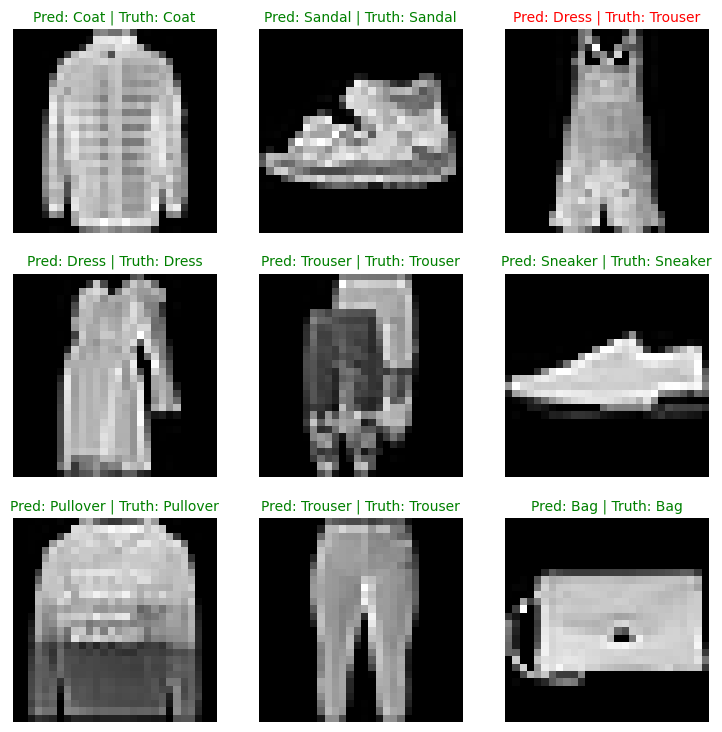

In [ ]:
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction (in text form, e.g "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form) 
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if prediction same as truth
  else:
    plt.title(title_text, fontsize=10, c="r") 
  
  plt.axis(False)

In [93]:
from tqdm.auto import tqdm 


# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    # Send the data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> prediction labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # Put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 5])

In [94]:

# See if required packages are installed and if not, install them...
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1] >= 19, "mlxtend version should be 0.19.0 or higher")
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  
  

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.4 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 7.0 MB/s eta 0:00:00
mlxtend version: 0.23.3


In [97]:
import mlxtend
print(mlxtend.__version__)

0.23.3


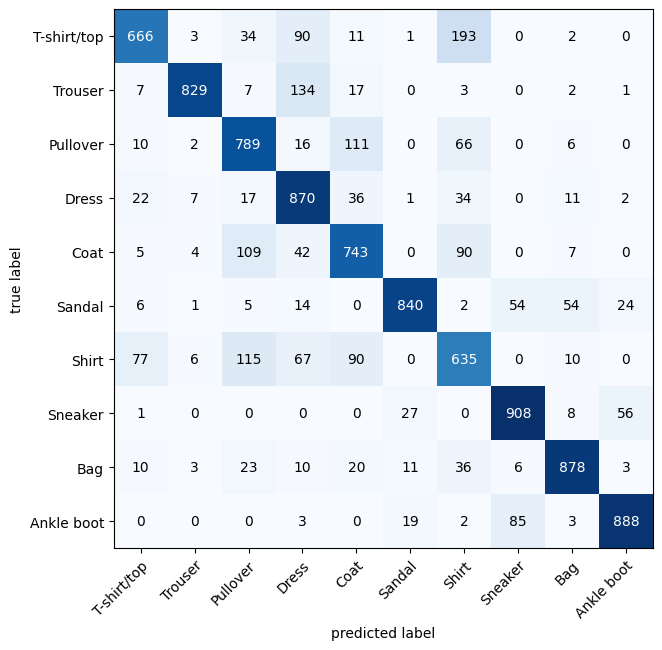

In [99]:

from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names),task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with numpy
    class_names=class_names,
    figsize=(10, 7)
)

In [101]:
from pathlib import Path

# Create model dictory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models\03_pytorch_computer_vision_model_2.pth
